In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def data_process(fname):
    data=pd.read_csv(fname)
    for col in data.columns:
        if col != "class":
                mean = data[col].mean()
                sig = data[col].std()
                data[col] = (data[col] - mean) / sig
    train=data.sample(frac=0.7) 
    test=data.drop(train.index)
    return train.iloc[:,:-1],test.iloc[:,:-1],train.iloc[:,-1],test.iloc[:,-1]

In [3]:
def initialize(dimensions):
    weights = {}
    L = len(dimensions) - 1
    for l in range(1,L+1):
        weights['W'+str(l)] = (np.random.randn(dimensions[l],dimensions[l-1])* np.sqrt(1/dimensions[l-1]))
        weights['b'+str(l)] = np.zeros((dimensions[l],1))

    return weights

In [58]:
def neural_network(X,Y,y_train,layer_dims,iteration=6000,lr=0.01,activation='relu'):
    
    weights= initialize(layer_dims)
    t=0
    hist_cost = []
    hist_acc=[]
    for i in range(iteration):
        zk,previous = forward_prop(X,weights,activation)
        cost = crossEntropy(zk,Y) 
        pred_y2 = predicty(X,weights)
        acc = np.mean(pred_y2.flatten()==y_train.flatten())*100
        hist_cost.append(cost)
        hist_acc.append(acc)
        
        pds = backprop(zk,Y,previous,weights,activation)
         
        if i%50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        t += 1
        weights = sgd(weights,pds,lr)
        
    print("Cost after iteration %i: %f" %(i, cost)) 
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(np.squeeze(hist_cost))
    ax2.plot(np.squeeze(hist_acc))
    
    plt.suptitle('Learing Rate = '+ str(lr))
    plt.show()
        
    return weights

In [59]:
def forward_prop(X,weights,activation='relu'):
    
    previous = {}
    A = X
    previous['A'+str(0)] = X
    L = len(weights) // 2  
    for l in range(1,L):
        A_prev = A
        Z = np.dot(weights['W'+str(l)],A_prev) + weights['b'+str(l)]
        previous['Z'+str(l)] = Z 
        if activation == 'tanh':
            A = np.tanh(Z)
            previous['A'+str(l)] = A
        else:
            A = relu(Z)
            previous['A'+str(l)] = A       
    Z = np.dot(weights['W'+str(L)],A) + weights['b'+str(L)]
    previous['Z'+str(L)] = Z 
    zk = softmax(Z)
    return zk,previous

In [60]:
def backprop(zk,Y,previous,weights,activation='relu'):
    pds = {}
    L = len(weights) //2
    m = zk.shape[1]
    dZ = zk-Y
    pds = gradient(dZ,pds,weights,previous,L,m)
    for l in reversed(range(1,L)):
        dA = pds['dA'+str(l)]
        if activation =='tanh':
            dZ = dA * tanh_grad(previous['Z'+str(l)])
        else:
            dZ = dA * relu_grad(previous['Z'+str(l)])   
        pds = gradient(dZ,pds,weights,previous,l,m)
    del pds['dA0']  
    return pds

In [61]:
def relu(Z):
    A = np.maximum(0,Z)
    return A 
def relu_grad(Z):
    grad = np.zeros(Z.shape)
    grad[Z>0] =1 
    return grad
def tanh_grad(Z):
    grad = (1 - np.tanh(Z)**2)
    return grad
def softmax(Z):
    A = np.exp(Z)/(np.sum(np.exp(Z),axis = 0))
    return A
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derv(x):
    return sigmoid(x) *(1-sigmoid (x))

In [62]:
def gradient(dZ,pds,weights,previous,l,m):
    dW = (1/m)* np.dot(dZ,previous['A'+str(l-1)].T)
    pds['dW'+str(l)] = dW
    db = (1/m)* np.sum(dZ,axis=1,keepdims=True)
    pds['db'+str(l)] = db
    dA_prev = np.dot(weights['W'+str(l)].T,dZ)
    pds['dA'+str(l-1)] = dA_prev
    return pds

In [63]:
def sgd(weights, pds,lr= 0.01): 
    L = len(weights) // 2   
    for l in range(L):
        weights["W" + str(l+1)] = weights["W" + str(l+1)] - (lr*pds["dW" + str(l+1)])
        weights["b" + str(l+1)] = weights["b" + str(l+1)] - (lr*pds["db" + str(l+1)])
    return weights

In [64]:
def crossEntropy(zk,Y):
    cost =0
    cost = np.mean(-np.sum(Y*np.log(zk),axis=0))        
    return cost

In [65]:
def predicty(X2,weights2):
    zk,_ = forward_prop(X2,weights2)
    pred = np.argmax(zk,axis=0)+1
    return pred

In [66]:
import pandas as pd
fname='/Users/durbasatpathi/Documents/ml/a2/dataset_NN.csv'
X_train,x_test,y_train,y_test = data_process(fname)

In [67]:
X_train = X_train.T
x_test = x_test.T
y_train_one_hot=pd.get_dummies(y_train).T
y_test_one_hot=pd.get_dummies(y_test).T
y_train = y_train.T
y_test = y_test.T

In [68]:
X_train= np.array(X_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_train_one_hot = np.array(y_train_one_hot)
y_test_one_hot = np.array(y_test_one_hot)


Cost after iteration 0: 2.438255
Cost after iteration 50: 2.344169
Cost after iteration 100: 2.259110
Cost after iteration 150: 2.182006
Cost after iteration 200: 2.111922
Cost after iteration 250: 2.048043
Cost after iteration 300: 1.989661
Cost after iteration 350: 1.936159
Cost after iteration 400: 1.887001
Cost after iteration 450: 1.841718
Cost after iteration 500: 1.799903
Cost after iteration 550: 1.761197
Cost after iteration 600: 1.725288
Cost after iteration 650: 1.691899
Cost after iteration 700: 1.660788
Cost after iteration 750: 1.631740
Cost after iteration 800: 1.604564
Cost after iteration 850: 1.579091
Cost after iteration 900: 1.555171
Cost after iteration 950: 1.532668
Cost after iteration 1000: 1.511461
Cost after iteration 1050: 1.491442
Cost after iteration 1100: 1.472514
Cost after iteration 1150: 1.454587
Cost after iteration 1200: 1.437583
Cost after iteration 1250: 1.421428
Cost after iteration 1300: 1.406059
Cost after iteration 1350: 1.391415
Cost after iter

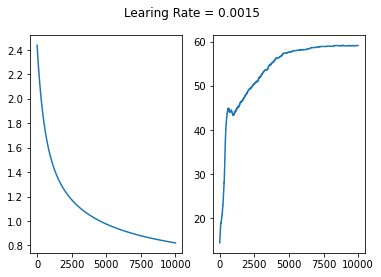

In [72]:
layer_dims2 = [6,32,10]
weights2 = neural_network(X_train,y_train_one_hot,y_train,layer_dims2,lr=0.0015,iteration=10000,activation='tanh')

In [70]:
pred_y2 = predicty(X_train,weights2)
acc = np.mean(pred_y2.flatten()==y_train.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc,2))

Accuracy on the dataset: 68.86 %


In [71]:
pred_y3 = predicty(x_test,weights2)
acc1 = np.mean(pred_y3.flatten()==y_test.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc1,2))

Accuracy on the dataset: 70.5 %


Cost after iteration 0: 2.493323
Cost after iteration 50: 2.375099
Cost after iteration 100: 2.271562
Cost after iteration 150: 2.180419
Cost after iteration 200: 2.099800
Cost after iteration 250: 2.028161
Cost after iteration 300: 1.964209
Cost after iteration 350: 1.906849
Cost after iteration 400: 1.855145
Cost after iteration 450: 1.808298
Cost after iteration 500: 1.765631
Cost after iteration 550: 1.726567
Cost after iteration 600: 1.690620
Cost after iteration 650: 1.657383
Cost after iteration 700: 1.626511
Cost after iteration 750: 1.597717
Cost after iteration 800: 1.570759
Cost after iteration 850: 1.545431
Cost after iteration 900: 1.521561
Cost after iteration 950: 1.499000
Cost after iteration 1000: 1.477624
Cost after iteration 1050: 1.457325
Cost after iteration 1100: 1.438010
Cost after iteration 1150: 1.419597
Cost after iteration 1200: 1.402016
Cost after iteration 1250: 1.385207
Cost after iteration 1300: 1.369114
Cost after iteration 1350: 1.353688
Cost after iter

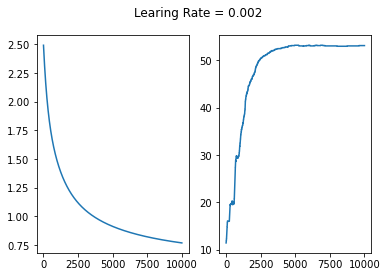

In [76]:
layer_dims2 = [6,32,10]
weights2 = neural_network(X_train,y_train_one_hot,y_train,layer_dims2,lr=0.002,iteration=10000,activation='tanh')

In [30]:
pred_y2 = predicty(X_train,weights2)
acc = np.mean(pred_y2.flatten()==y_train.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc,2))
pred_y3 = predicty(x_test,weights2)
acc1 = np.mean(pred_y3.flatten()==y_test.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc1,2))

Accuracy on the dataset: 56.36 %
Accuracy on the dataset: 58.67 %


Cost after iteration 0: 2.607668
Cost after iteration 50: 0.751901
Cost after iteration 99: 0.669626


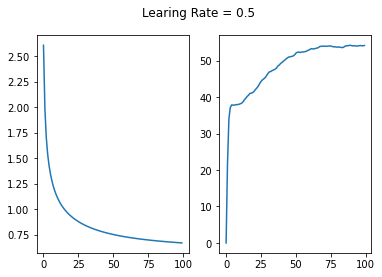

In [75]:
layer_dims2 = [6,32,10]
weights2 = neural_network(X_train,y_train_one_hot,y_train,layer_dims2,lr=0.5,iteration=100,activation='tanh')

In [41]:
pred_y2 = predicty(X_train,weights2)
acc = np.mean(pred_y2.flatten()==y_train.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc,2))
pred_y3 = predicty(x_test,weights2)
acc1 = np.mean(pred_y3.flatten()==y_test.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc1,2))

Accuracy on the dataset: 57.14 %
Accuracy on the dataset: 56.67 %


Cost after iteration 0: 2.407796
Cost after iteration 50: 2.035775
Cost after iteration 100: 1.785730
Cost after iteration 150: 1.588415
Cost after iteration 200: 1.430994
Cost after iteration 250: 1.305002
Cost after iteration 300: 1.202436
Cost after iteration 350: 1.118481
Cost after iteration 400: 1.050166
Cost after iteration 450: 0.994887
Cost after iteration 500: 0.949531
Cost after iteration 550: 0.911651
Cost after iteration 600: 0.879443
Cost after iteration 650: 0.851955
Cost after iteration 700: 0.828326
Cost after iteration 750: 0.808080
Cost after iteration 800: 0.790667
Cost after iteration 850: 0.775773
Cost after iteration 900: 0.762956
Cost after iteration 950: 0.751857
Cost after iteration 999: 0.742353


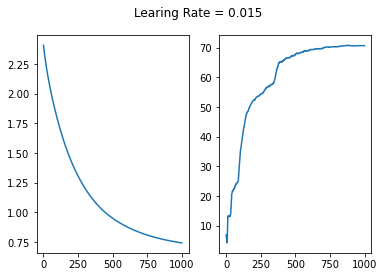

In [77]:
layer_dims2 = [6,32,32,10]
weights2 = neural_network(X_train,y_train_one_hot,y_train,layer_dims2,lr=0.015,iteration=1000,activation='relu')

In [74]:
pred_y2 = predicty(X_train,weights2)
acc = np.mean(pred_y2.flatten()==y_train.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc,2))
pred_y3 = predicty(x_test,weights2)
acc1 = np.mean(pred_y3.flatten()==y_test.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc1,2))

Accuracy on the dataset: 71.79 %
Accuracy on the dataset: 68.83 %


Cost after iteration 0: 2.481342
Cost after iteration 50: 1.425255
Cost after iteration 100: 1.085858
Cost after iteration 150: 0.924114
Cost after iteration 200: 0.837258
Cost after iteration 250: 0.783885
Cost after iteration 300: 0.748538
Cost after iteration 350: 0.724458
Cost after iteration 400: 0.707446
Cost after iteration 450: 0.694641
Cost after iteration 500: 0.684365
Cost after iteration 550: 0.675707
Cost after iteration 600: 0.667940
Cost after iteration 650: 0.661007
Cost after iteration 700: 0.654517
Cost after iteration 750: 0.648291
Cost after iteration 800: 0.642480
Cost after iteration 850: 0.636955
Cost after iteration 900: 0.631719
Cost after iteration 950: 0.626704
Cost after iteration 999: 0.621921


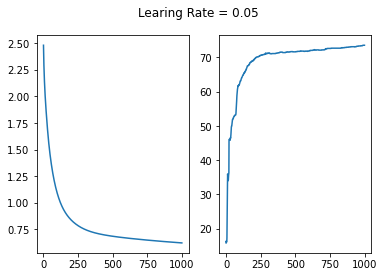

In [78]:
layer_dims2 = [6,32,32,10]
weights2 = neural_network(X_train,y_train_one_hot,y_train,layer_dims2,lr=0.05,iteration=1000,activation='relu')

In [79]:
pred_y2 = predicty(X_train,weights2)
acc = np.mean(pred_y2.flatten()==y_train.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc,2))
pred_y3 = predicty(x_test,weights2)
acc1 = np.mean(pred_y3.flatten()==y_test.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc1,2))

Accuracy on the dataset: 73.57 %
Accuracy on the dataset: 71.33 %


Cost after iteration 0: 2.597664
Cost after iteration 50: 1.068640
Cost after iteration 99: 0.807507


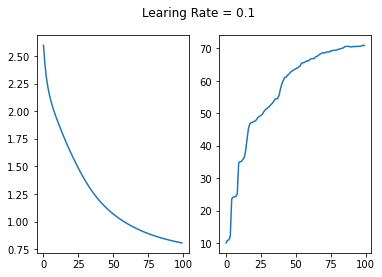

In [80]:
layer_dims2 = [6,32,32,10]
weights2 = neural_network(X_train,y_train_one_hot,y_train,layer_dims2,lr=0.1,iteration=100,activation='relu')

In [81]:
pred_y2 = predicty(X_train,weights2)
acc = np.mean(pred_y2.flatten()==y_train.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc,2))
pred_y3 = predicty(x_test,weights2)
acc1 = np.mean(pred_y3.flatten()==y_test.flatten())*100
print('Accuracy on the dataset: %s %%' %round(acc1,2))

Accuracy on the dataset: 70.93 %
Accuracy on the dataset: 68.0 %
